<a href="https://colab.research.google.com/github/dron1t/codelabfun/blob/main/IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raport American census



## Importing data

In [ ]:
import pandas as pd

train_data = pd.read_csv('adult.train.csv')
test_data = pd.read_csv('adult.test.csv')

data = pd.concat([train_data, test_data])

In [ ]:
data

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Checking data

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
eduction          0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
data.isin([' ?', '']).sum()

age                  0
workclass         2799
fnlwgt               0
eduction             0
education.num        0
marital.status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     857
income               0
dtype: int64

### Missing values in columns:
* workclass 2799
* occupation 2809
* native.country 857

Checking types of data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   eduction        48842 non-null  object
 4   education.num   48842 non-null  int64 
 5   marital.status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital.gain    48842 non-null  int64 
 11  capital.loss    48842 non-null  int64 
 12  hours.per.week  48842 non-null  int64 
 13  native.country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


Check duplicates

In [ ]:
data.duplicated().sum()

29

## Some cleanup before analysis

We've noticed that income has 2 values for each category `51K.` and `51K` without ending dot 

In [ ]:
data['income'] = data['income'].replace(' <=50K.', ' <=50K')
data['income'] = data['income'].replace(' >50K.', ' >50K')
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Analysis

Feature classes per sex

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop(['sex'])
categorical_features

Index(['workclass', 'eduction', 'marital.status', 'occupation', 'relationship',
       'race', 'native.country', 'income'],
      dtype='object')

<ipython-input-74-9c12d2f713dc>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5, 2, i+1)


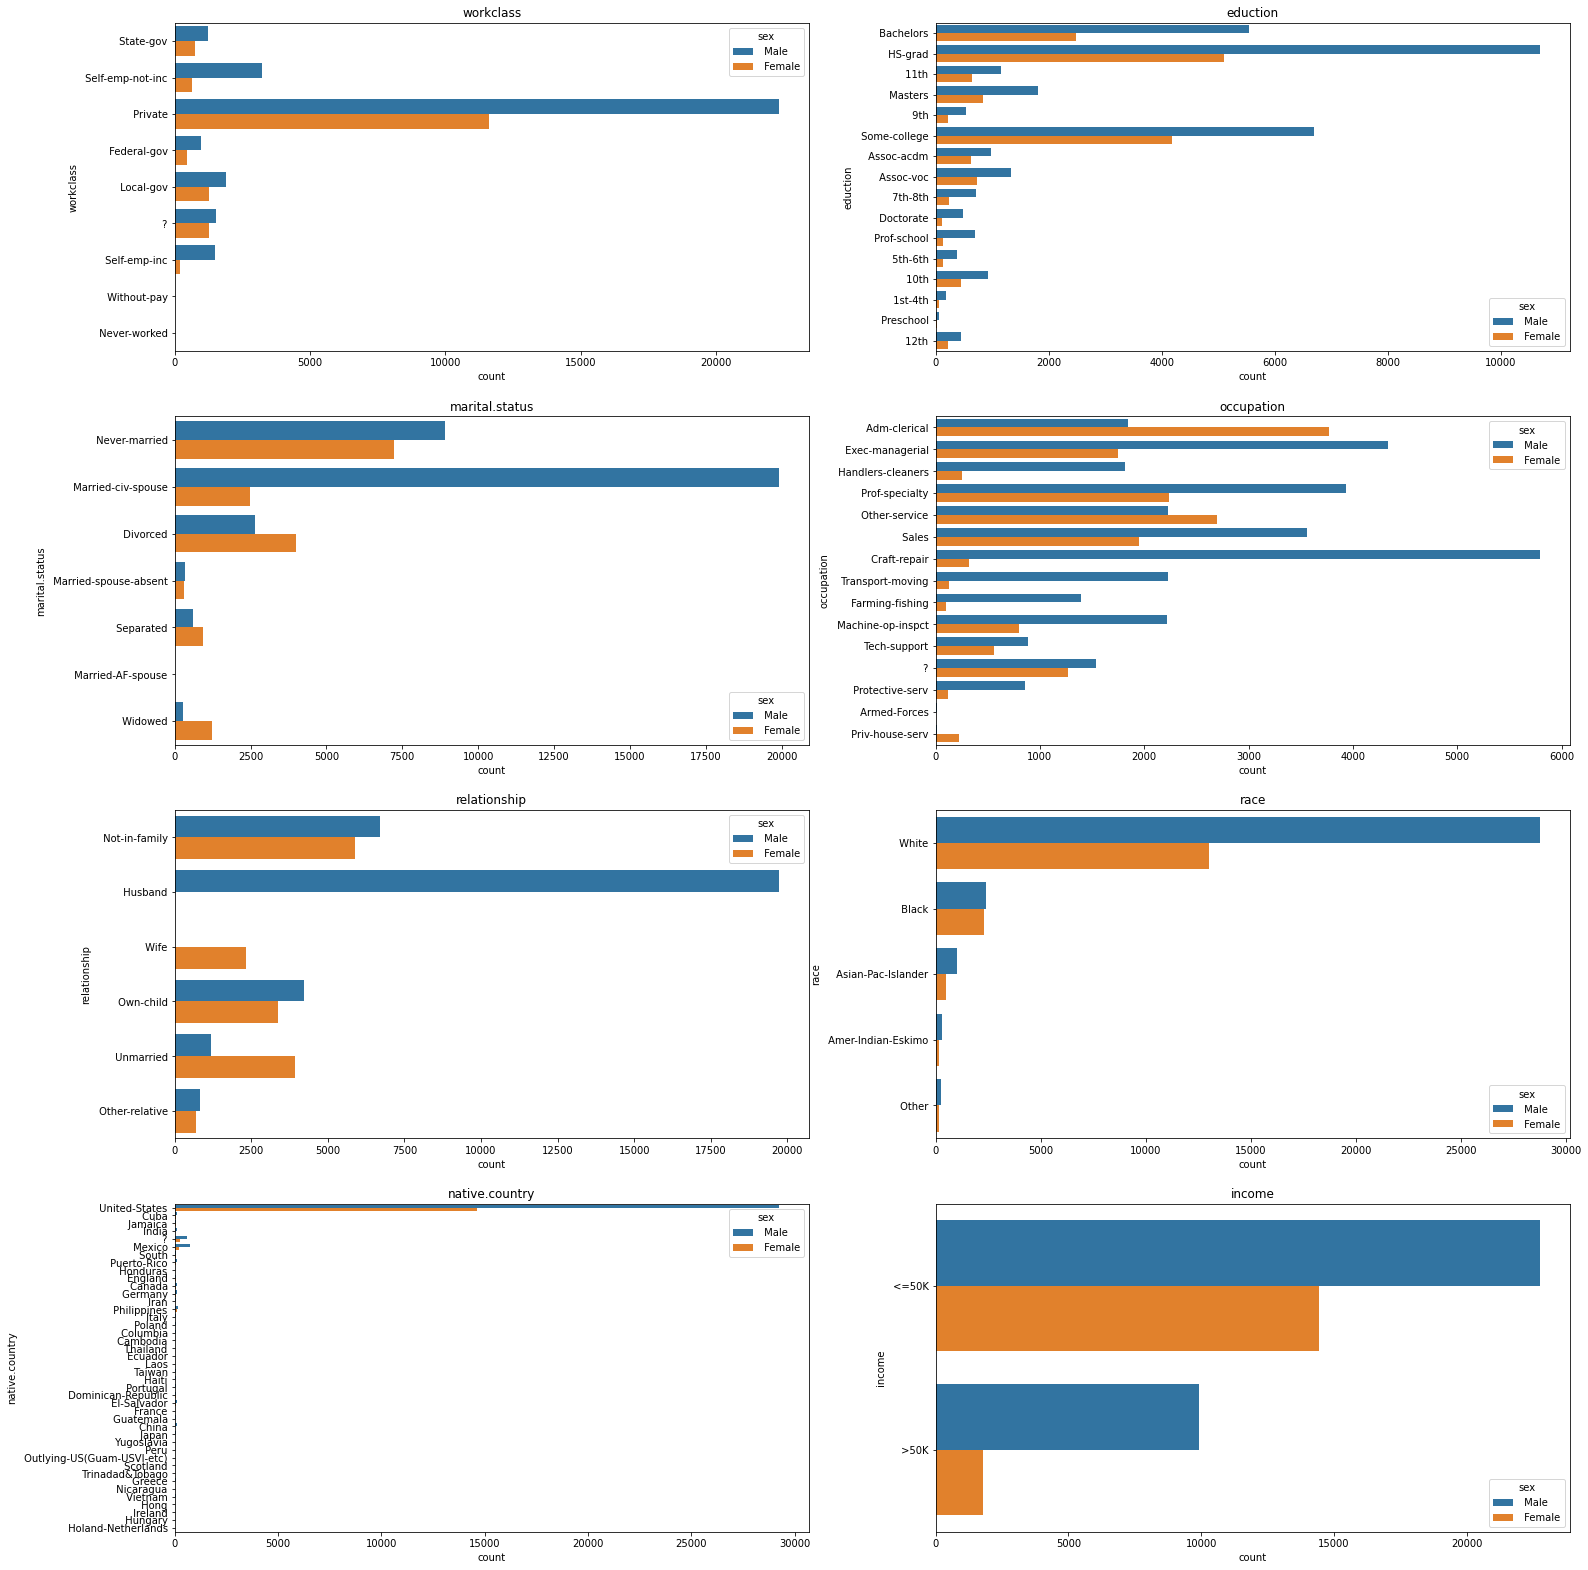

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,35))
plt.subplot(521)
dt = data
i=0
for c in categorical_features:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(y=c, data=dt, hue='sex')
    plt.title(c)

plt.show()

## Data preparation (pre-processing of data)

Drop duplicates

In [ ]:
data = data.drop_duplicates()

We have one binary value column: sex and multiple discreete value columns.

We are going to replace values in column sex with (0,1) values

We are creating a columns with names corresponding to values from discreet columns, so when option was chosen the value in corresponding column is set to 1 otherwise to 0

In [ ]:
binary_features = ['sex']
nominal_features = ['workclass'  ,'marital.status' , 'relationship' , 'race' ,'native.country' , 'occupation']



In [ ]:
#data

,age,workclass,fnlwgt,eduction,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


Drop education as it is already encoded

In [ ]:
data = data.drop('eduction', axis=1)

## Impute missing values

We have few columns with some missing data. There are a few ways to deal with it by using imputation: [link](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) 
* Ignore it
* Use median
* Use the most fequent 
* Use constant value
* Use kNN algorithm
* Use Multivariate Imputation by Chained Equation (MICE)
* Use Deep Learning (Datawig)

We can't use median or mean as these values belong to categorical features. As that we are going to use: (try MICE)

## Split data

In [ ]:
data

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Hot encoding
We are hot ecoding data using nominal_features which corresponds to categorical data within our dataset. 

"Categorical data are variables that contain label values rather than numeric values"[[1](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)][[2](https://en.wikipedia.org/wiki/Nominal_category)]

In [1]:

data_after_hot_encoding = pd.get_dummies(data, columns=nominal_features)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text

(train_set, test_set) = train_test_split(data, train_size=0.7, random_state=163686)

train_classes = train_set['income']
train_set = train_set.drop(['income'], axis=1)
test_classes = test_set['income']
test_set = test_set.drop(['income'], axis=1)

columns = train_set.columns

train_set.values

array([[    51, 290856,      9, ...,      1,      0,      0],
       [    34, 190228,     13, ...,      1,      0,      0],
       [    19, 140590,      8, ...,      1,      0,      0],
       ...,
       [    60, 165441,      4, ...,      1,      0,      0],
       [    52, 221936,      9, ...,      1,      0,      0],
       [    42, 202466,     12, ...,      1,      0,      0]])

## Compensation of missing column
As we did imputation we are missing some columns in test set compared to the train set. So we're going to add that to the test set. 

In [ ]:
import numpy as np
diff = np.setdiff1d(train_set, test_set)

In [ ]:
test_set[[]] = 0

## Decision Tree

ValueError: ignored

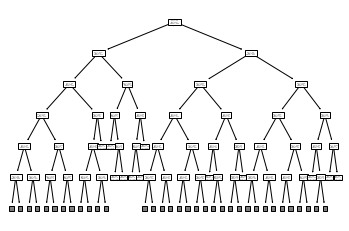

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_set.values, train_classes.values)

tree.plot_tree(clf, max_depth=5)
# r = export_text(clf, feature_names=columns.values)
# print(r)
good_predictions = 0
len = test_set.shape[0]
test_classes = test_classes.values
res = clf.predict(test_set.values)
for i,r in enumerate(res):
    if r == test_classes[i]:
        good_predictions = good_predictions + 1
print(good_predictions)
print(good_predictions / len * 100, "%")
#print(train_set[train_set[:, 3].argsort()])
print(confusion_matrix(test_classes, res))

# kNN


